In [207]:
import os
import csv
import os.path as osp

import pandas as pd
import numpy as np

import iFeatureOmegaCLI

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.svm import LinearSVC

from sklearn.feature_selection import chi2
from sklearn.metrics import f1_score, precision_score, recall_score

In [208]:
BASE_DIR = os.getcwd()

DATA_DIR = osp.join(BASE_DIR, 'Data')

In [209]:
SEED = 42
np.random.seed(SEED)

In [4]:
#positional concatenation of mirnaseq with mirna_esa
def with_esa_mirna(miRNA, miRNA_esa):
    miRNA_withESA=[]
    for i in range(len(miRNA)):
        con_mirna_esa = miRNA_esa[i][:10] + miRNA[i][10:]
        con_mirna_esa = miRNA_esa[i] + miRNA[i][len(miRNA_esa[i]):]
        miRNA_withESA.append(con_mirna_esa)
    
    return miRNA_withESA

In [5]:
def with_esa_mrna(rev_mRNA,mRNA_CTS_esa):
    mRNA_withESA=[]
    for i in range(len(rev_mRNA)):
        con_mrna_esa = rev_mRNA[i][:5] + mRNA_CTS_esa[i] + rev_mRNA[i][len(rev_mRNA[i][:5] + mRNA_CTS_esa[i]):]
        mRNA_withESA.append(con_mrna_esa)
    return mRNA_withESA

In [6]:
def get_sequences(df):
    mrna = with_esa_mrna(df.rev_mRNA, df.mRNA_CTS_esa)
    mirna = with_esa_mirna(df.miRNA, df.miRNA_esa)
    labels = df.Label.tolist()
    return mrna, mirna, labels

In [7]:
def get_mirna_sequence(mirna_list, filename):
    with open(filename, "w") as f:
        for i, seq in enumerate(mirna_list):
            line = f">seq_{i}\n{seq}\n"
            f.write(line)
    return None

In [8]:
def get_mrna_sequence(mrna_list, filename):
    with open(filename, "w") as f:
        for i, seq in enumerate(mrna_list):
            line = f">seq_{i}\n{seq}\n"
            f.write(line)
    return None

In [9]:
def get_features(filepath):
    df = pd.read_csv(filepath)
    base_path = "/".join(filepath.split("/")[:-1])
    fname_mi = f'{filepath.split("/")[-1].split(".")[0]}_features_mirna.txt'
    fname_mr = f'{filepath.split("/")[-1].split(".")[0]}_features_mrna.txt'
    new_path_mi = osp.join(base_path, fname_mi)
    new_path_mr = osp.join(base_path, fname_mr)
    try:
        mrna_list, mirna_list, labels = get_sequences(df)
        mirna_seq = get_mirna_sequence(mirna_list, new_path_mi)
        mrna_seq = get_mrna_sequence(mrna_list, new_path_mr)
        
#         mi_feature_scp = iFeatureOmegaCLI.iRNA(new_path_mi)
#         mi_feature_scp.import_parameters('/home/dhakal/TPiFO/Parameters/parameters.json')
#         mi_feature_scp.get_descriptor(descriptor= 'SCPseDNC')
        
#         mr_feature_scp = iFeatureOmegaCLI.iRNA(new_path_mr)
#         mr_feature_scp.import_parameters('/home/dhakal/TPiFO/Parameters/parameters.json')
#         mr_feature_scp.get_descriptor(descriptor= 'SCPseDNC')
        
#         X1 = np.concatenate((mi_feature_scp.encodings.values, mr_feature_scp.encodings.values),axis=1)

#         mi_feature_pcp = iFeatureOmegaCLI.iRNA(new_path_mi)
#         mi_feature_pcp.import_parameters('/home/dhakal/TPiFO/Parameters/parameters.json')
#         mi_feature_pcp.get_descriptor(descriptor= 'PCPseDNC')
        
#         mr_feature_pcp = iFeatureOmegaCLI.iRNA(new_path_mr)
#         mr_feature_pcp.import_parameters('/home/dhakal/TPiFO/Parameters/parameters.json')
#         mr_feature_pcp.get_descriptor(descriptor= 'PCPseDNC')
        
#         X2 = np.concatenate((mi_feature_pcp.encodings.values, mr_feature_pcp.encodings.values),axis=1)
        
#         mi_feature_kmer = iFeatureOmegaCLI.iRNA(new_path_mi)
#         mi_feature_kmer.import_parameters('/home/dhakal/TPiFO/Parameters/parameters.json')
#         mi_feature_kmer.get_descriptor(descriptor= 'Kmer type 1')
        
#         mr_feature_kmer = iFeatureOmegaCLI.iRNA(new_path_mr)
#         mr_feature_kmer.import_parameters('/home/dhakal/TPiFO/Parameters/parameters.json')
#         mr_feature_kmer.get_descriptor(descriptor= 'Kmer type 1')
        
#         X = np.concatenate((mi_feature_kmer.encodings.values, mr_feature_kmer.encodings.values),axis=1)
        
        mi_feature_dpcp = iFeatureOmegaCLI.iRNA(new_path_mi)
        mi_feature_dpcp.import_parameters('/home/dhakal/TPiFO/Parameters/parameters.json')
        mi_feature_dpcp.get_descriptor(descriptor= 'DPCP')
        
        mr_feature_dpcp = iFeatureOmegaCLI.iRNA(new_path_mr)
        mr_feature_dpcp.import_parameters('/home/dhakal/TPiFO/Parameters/parameters.json')
        mr_feature_dpcp.get_descriptor(descriptor= 'DPCP')
        
        X = np.concatenate((mi_feature_dpcp.encodings.values, mr_feature_dpcp.encodings.values),axis=1)
        
#         mi_feature_psknc = iFeatureOmegaCLI.iRNA(new_path_mi)
#         mi_feature_psknc.import_parameters('/home/dhakal/TPiFO/Parameters/parameters.json')
#         mi_feature_psknc.get_descriptor(descriptor= 'PseKNC')
        
#         mr_feature_psknc = iFeatureOmegaCLI.iRNA(new_path_mr)
#         mr_feature_psknc.import_parameters('/home/dhakal/TPiFO/Parameters/parameters.json')
#         mr_feature_psknc.get_descriptor(descriptor= 'PseKNC')
        
#         X5 = np.concatenate((mi_feature_psknc.encodings.values, mr_feature_psknc.encodings.values),axis=1)

#         X = np.concatenate((X1, X2, X3, X4, X5),axis=1)
        y = np.array(labels, dtype="float32")
        return X, y
    except Exception as e:
        print(e)

In [10]:
# Create features from the Train_Val file
import warnings
warnings.filterwarnings("ignore")
scores = []
for i, (path, directory, files) in enumerate(os.walk(DATA_DIR)):    
    if "miRAW_Train_Validation" in path:
        for file in files:
            if "features" not in file:
                fullpath = osp.join(path, file)
                print(fullpath)
                data = get_features(fullpath)
                X, y = data
                skf = StratifiedKFold(n_splits=4, random_state=SEED, shuffle=True)
                for i, (train_index, val_index) in enumerate(skf.split(X, y)):
                    X_train, y_train = X[train_index], y[train_index]
                    X_val, y_val = X[val_index], y[val_index]                   

/home/dhakal/TPiFO/Data/miRAW_Train_Validation/miRAW_Train_Validation.csv
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}


In [11]:
X_train_original = X_train.copy()
X_val_original = X_val.copy()

In [12]:
X_train_df = pd.DataFrame(X_train_original, index= None, columns=None )
X_val_df = pd.DataFrame(X_val_original, index= None, columns=None )

In [13]:
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,0.0,0.0,0.550000,0.36,0.0,0.0,0.0,0.0,0.187778,0.0,...,1.50,0.833333,1.777778,0.000000,1.777778,2.666667,2.666667,3.555556,1.722222,3.444444
1,0.0,0.0,0.550000,0.36,0.0,0.0,0.0,0.0,0.187778,0.0,...,0.00,2.500000,1.777778,0.972222,0.000000,0.888889,3.555556,2.666667,2.583333,6.027778
2,0.0,0.0,0.550000,0.36,0.0,0.0,0.0,0.0,0.187778,0.0,...,0.75,0.833333,0.000000,0.972222,0.888889,2.666667,5.333333,0.888889,2.583333,5.166667
3,0.0,0.0,0.550000,0.36,0.0,0.0,0.0,0.0,0.187778,0.0,...,1.50,1.666667,1.777778,0.000000,0.000000,2.666667,0.000000,4.444444,1.722222,4.305556
4,0.0,0.0,0.366667,0.18,0.0,0.0,0.0,0.0,0.187778,0.0,...,0.75,2.500000,0.888889,0.972222,0.888889,0.888889,2.666667,2.666667,0.000000,0.861111


In [14]:
X_train_df.shape, X_val_df.shape

((39830, 192), (13276, 192))

In [15]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train_df, 0.95)
print('correlated features: ', len(set(corr_features)) )

correlated features:  158


In [16]:
# removed correlated  features
X_train_df.drop(labels=corr_features, axis=1, inplace=True)
X_val_df.drop(labels=corr_features, axis=1, inplace=True)

X_train_df.shape, X_val_df.shape

((39830, 34), (13276, 34))

In [122]:
y_train

array([1., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [17]:
X_train = np.array(X_train_df)
X_val = np.array(X_val_df)

X_train.shape, X_val.shape

((39830, 34), (13276, 34))

In [214]:
from sklearn.manifold import TSNE

In [19]:
X_embedded_train = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_train)

In [20]:
X_embedded_val = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_val)

In [21]:
Xt, yt = X_embedded_train[:,0], X_embedded_train[:,1]

In [22]:
Xv, yv = X_embedded_val[:,0], X_embedded_val[:,1]

In [212]:
import matplotlib.pyplot as plt 
# plt.style.use('fivethirtyeight')
%matplotlib inline

In [213]:
import seaborn as sns
sns.set_style("whitegrid")

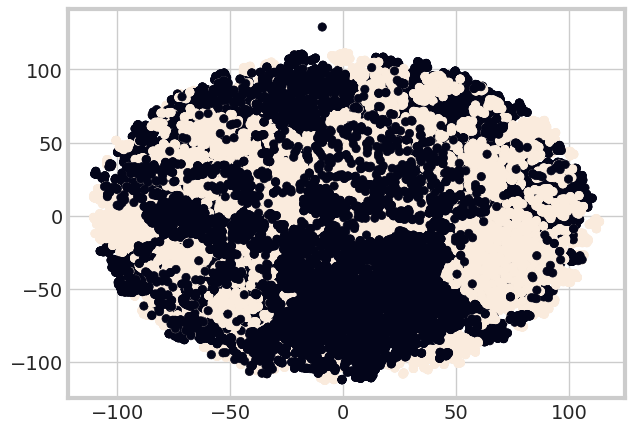

In [123]:
fig = plt.Figure(dpi=300)
plt.scatter(Xt,yt, c=y_train)
plt.scatter(Xv, yv, c=y_val)
plt.savefig('TestTSNE.jpg')
plt.show()

In [128]:
dataframe = []
label=[]
for i, (path,directory,files) in enumerate(os.walk(DATA_DIR)):
    if 'Test0' in path:
        for file in files:
            if 'features' not in file:
                try:
                    fullpath = osp.join(path,file)
                    data = get_features(fullpath)
                    X_test, y_test = data
                    X_test_df = pd.DataFrame(X_test, index=None, columns=None)
                    y_test_df = pd.DataFrame(y_test, index=None, columns=None)
                    X_test_df.drop(labels=corr_features, axis=1, inplace=True)
                    dataframe.append(X_test_df)
                    label.append(y_test_df)
                except Exception as e:
                    print(e)
                    print(fullpath)

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distance': 0, 'cp': 'cp(20)', 'nlag': 3, 'lambdaValue': 3, 'weight': 0.05}
File imported successfully.
{'sliding_window': 5, 'kspace': 3, 'kmer': 3, 'mismatch': 1, 'delta': 0, 'Di-RNA-Phychem': 'Rise (RNA);Roll (RNA);Shift (RNA);Slide (RNA);Tilt (RNA);Twist (RNA)', 'distanc

In [129]:
y_testlabel = pd.concat(label)

In [130]:
y_testlabel.shape

(1500688, 1)

In [26]:
test_df = pd.concat(dataframe)

In [27]:
X_test = np.array(test_df)

In [28]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,169
0,0.167368,0.341053,0.173684,0.000000,0.000000,0.524211,0.0,0.521053,0.533684,0.000000,...,0.188571,0.193143,0.000,0.094857,0.277714,0.279429,0.193143,0.176571,0.454286,0.0
1,0.167368,0.341053,0.173684,0.000000,0.000000,0.524211,0.0,0.521053,0.533684,0.000000,...,0.094286,0.193143,0.000,0.189714,0.277714,0.372571,0.193143,0.264857,0.272571,0.0
2,0.167368,0.341053,0.173684,0.000000,0.000000,0.524211,0.0,0.521053,0.533684,0.000000,...,0.094286,0.193143,0.000,0.189714,0.370286,0.372571,0.193143,0.264857,0.181714,0.0
3,0.167368,0.341053,0.173684,0.000000,0.000000,0.524211,0.0,0.521053,0.533684,0.000000,...,0.094286,0.193143,0.000,0.189714,0.370286,0.372571,0.193143,0.264857,0.181714,0.0
4,0.167368,0.341053,0.173684,0.000000,0.000000,0.524211,0.0,0.521053,0.533684,0.000000,...,0.094286,0.193143,0.000,0.189714,0.370286,0.372571,0.193143,0.264857,0.272571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.374118,0.190588,0.000000,0.571765,0.181765,0.195294,0.0,0.194118,0.397647,0.189412,...,0.377143,0.096571,0.000,0.379429,0.462857,0.093143,0.386286,0.264857,0.545143,0.0
340,0.374118,0.190588,0.000000,0.571765,0.181765,0.195294,0.0,0.194118,0.397647,0.189412,...,0.282857,0.096571,0.000,0.379429,0.462857,0.093143,0.289714,0.264857,0.363429,0.0
341,0.374118,0.190588,0.000000,0.571765,0.181765,0.195294,0.0,0.194118,0.397647,0.189412,...,0.282857,0.096571,0.000,0.284571,0.462857,0.186286,0.289714,0.264857,0.454286,0.0
342,0.374118,0.190588,0.000000,0.571765,0.181765,0.195294,0.0,0.194118,0.397647,0.189412,...,0.282857,0.096571,0.092,0.379429,0.462857,0.186286,0.289714,0.264857,0.545143,0.0


In [29]:
X_embedded_test = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_test)

In [30]:
Xtest, ytest = X_embedded_test[:,0], X_embedded_test[:,1]

In [173]:
# list(ytest)

In [155]:
colors = {0.0:"red",
         1.0:'blue'}

In [163]:
ylabels = list(y_testlabel.to_numpy().squeeze())

In [169]:
y_label = np.array(ylabels)

In [158]:
ycolors =  list(map(lambda x: colors[x], ylabels))

In [190]:
d = {'x1': list(Xtest), 'x2': list(ytest), 'y': ylabels, 'color': ycolors }

plot_df = pd.DataFrame(data=d)

In [180]:
# d = {'x1': list(Xtest)[:100], 'x2': list(ytest)[:100], 'y': ylabels[:100], 'color': ycolors[:100] }

# plot_df = pd.DataFrame(data=d)

In [191]:
plot_df.head()

,x1,x2,y,color
0,21.664896,58.224857,1.0,blue
1,21.458523,60.462757,1.0,blue
2,21.455091,60.455059,1.0,blue
3,21.458036,60.456467,1.0,blue
4,21.446030,60.423882,1.0,blue


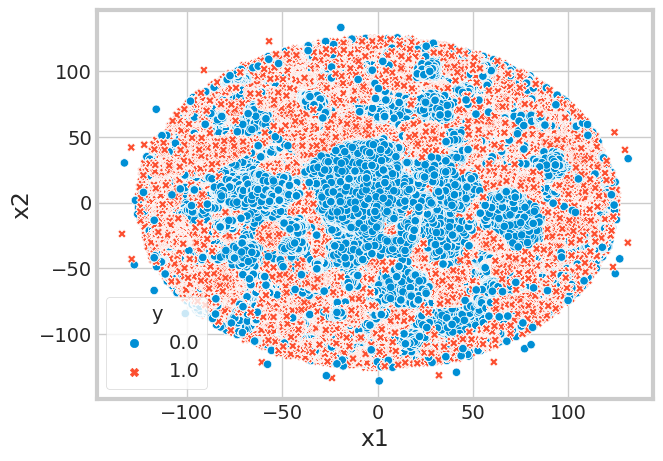

In [192]:
plt.figure()
# fig, ax = plt.subplots()
ax = sns.scatterplot(data=plot_df, x='x1', y='x2', hue='y', style='y')
# plt.ylabel('tSNE-1')
# plt.xlabel('tSNE-2')
plt.show()

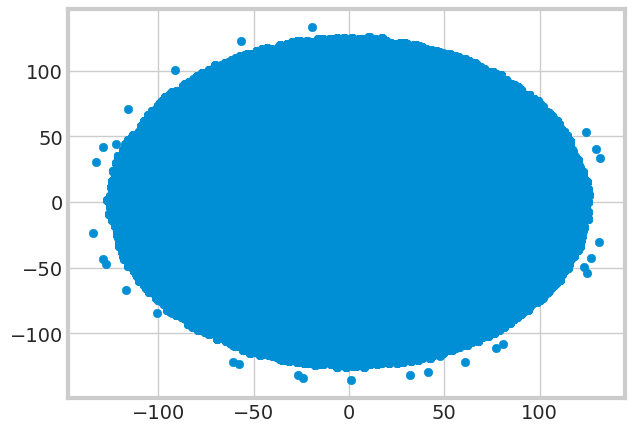

In [113]:
fig = plt.Figure(dpi=300)
plt.scatter(Xtest,ytest)
# # plt.scatter(Xt,yt, c='b')
# plt.scatter(Xv, yv, c='r')

# plt.savefig('datavisusalizeTSNE.jpg')
plt.show()


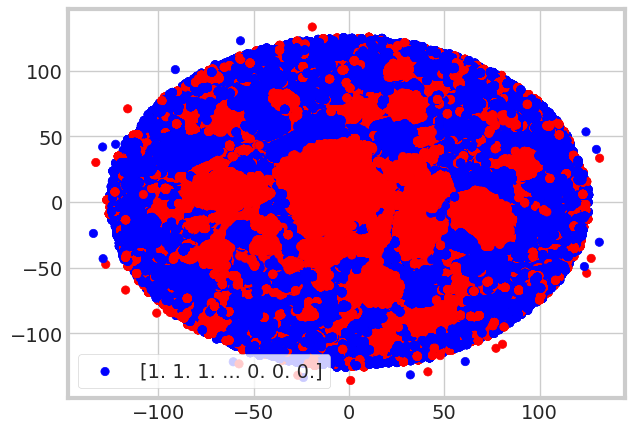

In [170]:
fig = plt.Figure(dpi=300)
plt.scatter(Xtest,ytest, c=ycolors, label=y_label)
# plt.scatter(Xt,yt, c=y_train)
# plt.scatter(Xv, yv, c=y_val)
plt.legend()
plt.savefig('datavisusalizeTSNE.jpg')
plt.show()

In [211]:
from sklearn.metrics import roc_auc_score,roc_curve

TypeError: 'str' object is not callable

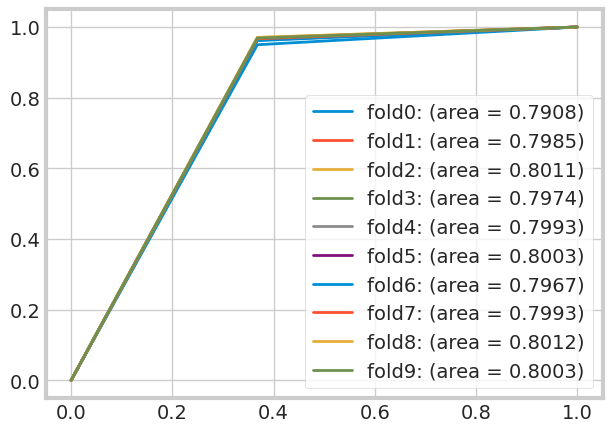

In [215]:
Acc=[]
fig = plt.Figure(dpi=300)
# plt.figure().patch.set_facecolor('white')
# plt.axes().set_facecolor('white')
# fig.patch.set_facecolor('white')
# plt.figure(facecolor='white')
for i in range(10):
    result_path = osp.join(DATA_DIR,f'miRAW_Test{i}/miRAW_Test{i}_results_Combine_Feature.txt')
    result_file = pd.read_csv(result_path)
    fp,tp,thr = roc_curve(result_file.label, result_file.max_score,)
    score = roc_auc_score(result_file.label, result_file.max_score)
    plt.plot(fp,tp,label=f'fold{i}: (area = {score:.4f})',lw=2)
# ax = plt.axes()
# ax.set_facecolor('white')

plt.legend() #facecolor='white', edgecolor = 'white'
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()
# plt.grid()
plt.savefig('rocplot.jpg')
plt.show()

#     accuracy = accuracy_score(result_file.label, result_file.max_score)
#     f1_scores = f1_score(result_file.label, result_file.max_score)
#     pre_score = precision_score(result_file.label, result_file.max_score)
#     re_score = recall_score(result_file.label, result_file.max_score)
#     Acc.append(accuracy)
#     print(f"Accuracy of test{i}",accuracy)
# print('F1 Score',np.average(f1_scores))
# print('Precision Score',np.average(pre_score))
# print('Recall Score',np.average(re_score))    
# print("Averag/e Accuracy",np.average(Acc))

In [204]:
for i in range(10):
    result_path = osp.join(DATA_DIR,f'miRAW_Test{i}/miRAW_Test{i}_results_PseKNC.txt')
    result_file = pd.read_csv(result_path)
    accuracy = accuracy_score(result_file.label, result_file.max_score)
    f1_scores = f1_score(result_file.label, result_file.max_score)
    pre_score = precision_score(result_file.label, result_file.max_score)
    re_score = recall_score(result_file.label, result_file.max_score)
    
    data = [accuracy,f1_scores,pre_score,re_score]

In [205]:
data

[0.7954128440366972, 0.8250980392156864, 0.719562243502052, 0.9669117647058824]